In [29]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime as dt

# visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()


In [3]:
# all the bank dataframes concatenated together
df = pd.read_pickle('all_banks')

In [4]:
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [5]:
'''
tickers of all banks

BAC = Bank of America
C = CitiGroup
GS = Goldman Sachs
JPM = JPMorgan Chase
MS = Morgan Stanley
WFC = Wells Fargo

'''
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [6]:
#to print max price of each bank's stocks throughout the time period

for tick in tickers:
    print(tick,df[tick]['Close'].max()) # df[index][coln_name]
    
# df.xs(key='Close', axis=1, level='Stock Info').max()      xs use for multi level indexing

BAC 54.9
C 564.1
GS 247.92
JPM 70.08
MS 89.3
WFC 58.52


# EDA 


In [7]:
# return for each bank's stock:
# r(t) = p(t)/p(t-1) - 1 here, t indicates time preiod(e.g date), p indicates price value

In [8]:
returns = pd.DataFrame() # create a new empty dataframe

In [16]:
# use pct_change() method on close column to create new column
for tick in tickers:
    returns[tick+'Return'] = df[tick]['Close'].pct_change()

In [17]:
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


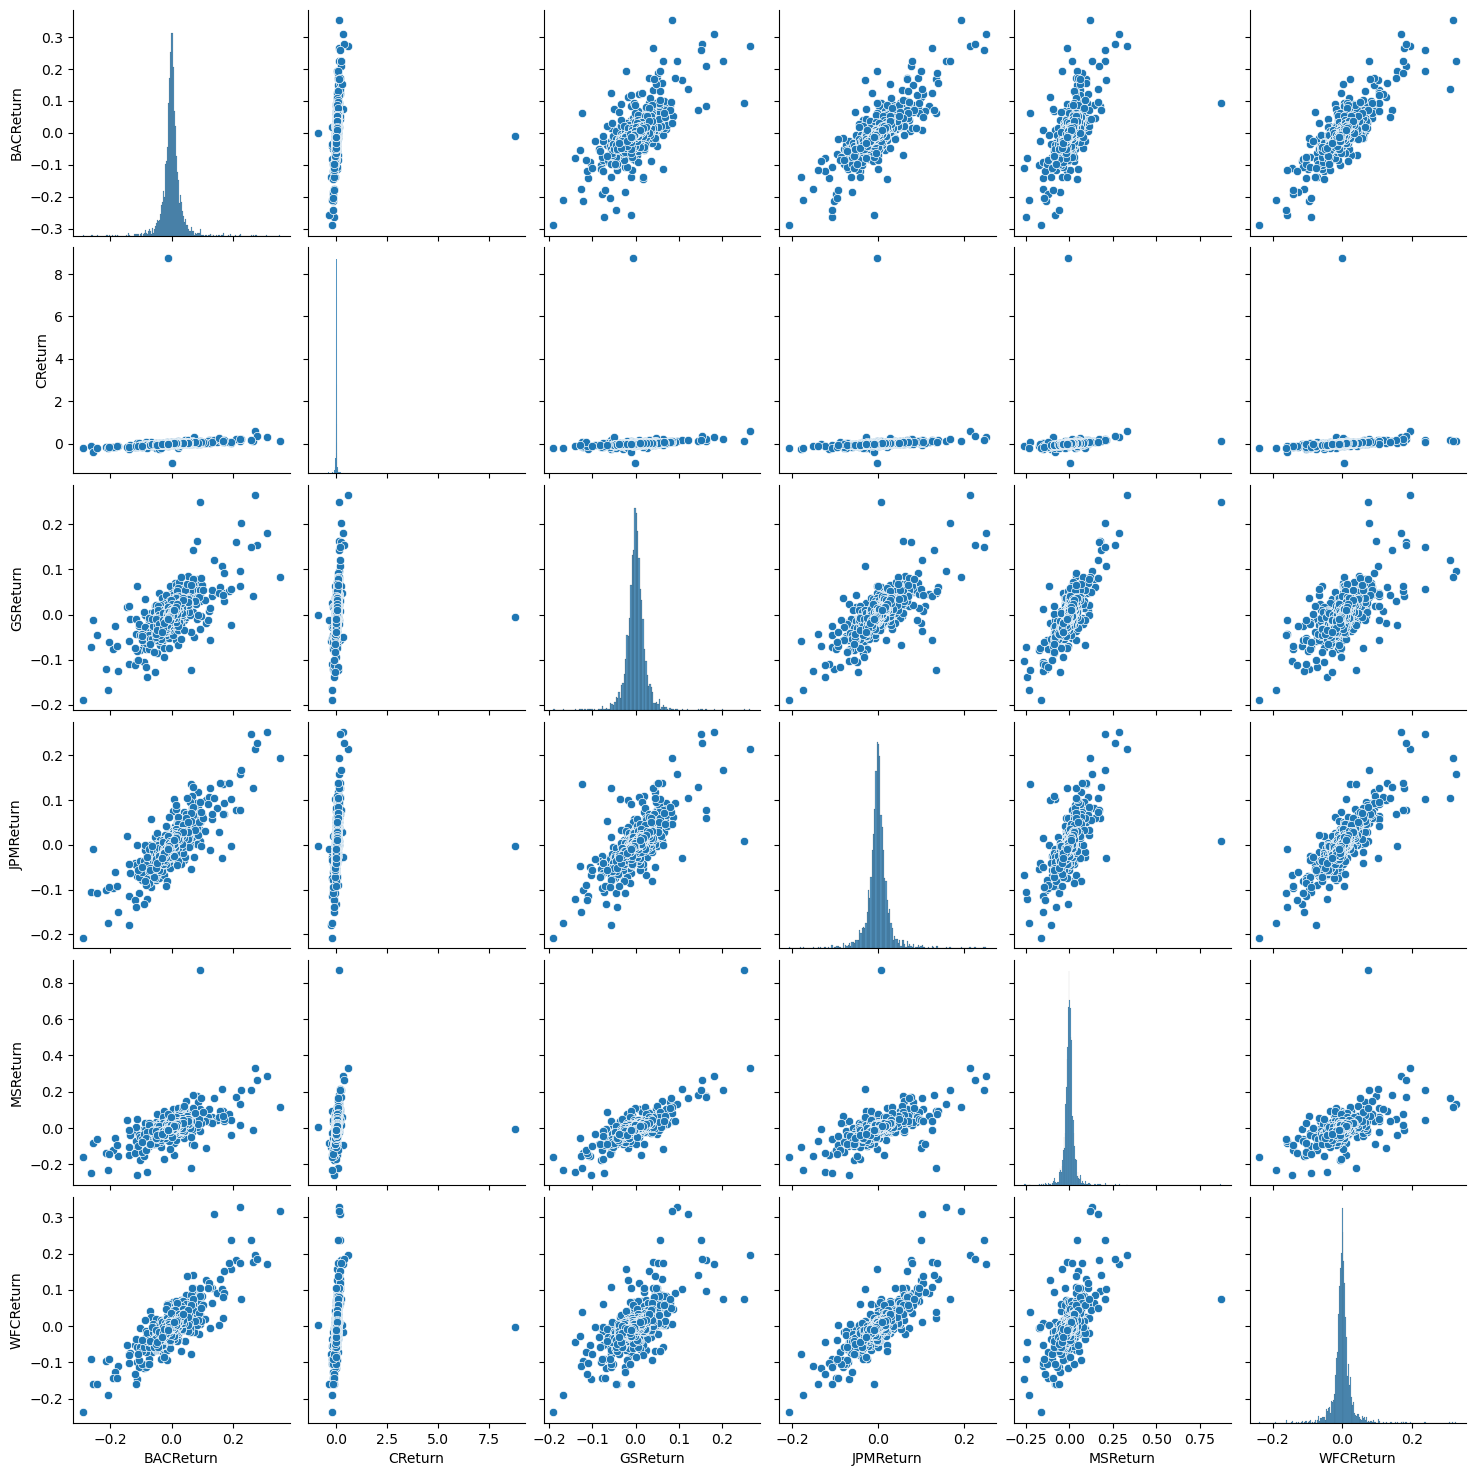

In [18]:
sns.pairplot(returns[1:])

# strange behaviour of C Return shows crisis of citi bank in 2008 

In [19]:
# to check worst singlw day return
returns.idxmin() # indexes of min values

BACReturn   2009-01-20
CReturn     2011-05-06
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [20]:
#to check best single day return
returns.idxmax()

BACReturn   2009-04-09
CReturn     2011-05-09
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [21]:
# to check riskiest stock over entire period use standard daviation method
returns.std()

BACReturn    0.036650
CReturn      0.179969
GSReturn     0.025346
JPMReturn    0.027656
MSReturn     0.037820
WFCReturn    0.030233
dtype: float64

if std is high than we can say that stock is not steady and risky
if std is low, than we can say that stock is steady over time period and not risky

result: Citi group's stock seems risky while it's std is higher than others.

In [23]:
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


In [26]:
# to check risk in year 2015
returns.loc['2015-01-01':'2015-12-31'].std()

BACReturn    0.016163
CReturn      0.015289
GSReturn     0.014046
JPMReturn    0.014017
MSReturn     0.016249
WFCReturn    0.012591
dtype: float64

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MSReturn', ylabel='Density'>

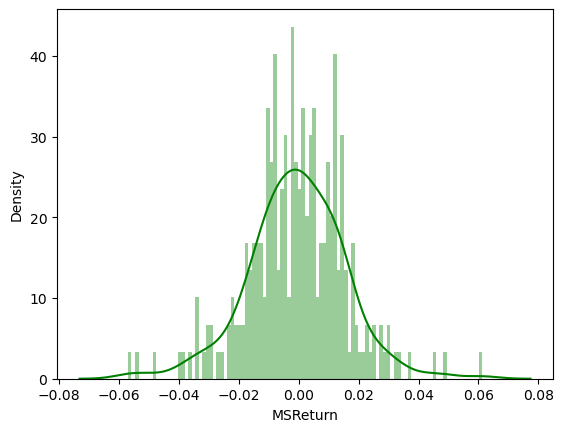

In [27]:
# create distplot for Morgan Stanley returns in year 2015
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MSReturn'],  color='green', bins=100)

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CReturn', ylabel='Density'>

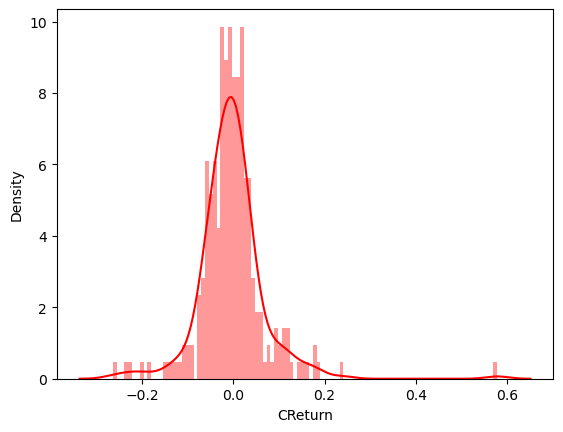

In [28]:
# create distplot for Citigroup returns in year 2008
sns.distplot(returns['2008-01-01':'2008-12-31']['CReturn'], color='red', bins=100)

<AxesSubplot:xlabel='Date'>

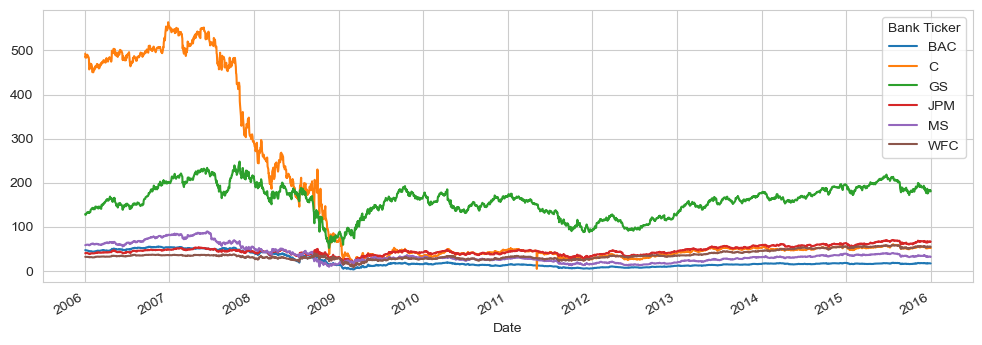

In [30]:
df.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))

In [32]:
# use plotly
df.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Average

now, Plot the rolling 30 day average against the Close Price for Bank Of America's(BAC) stock for the year 2008

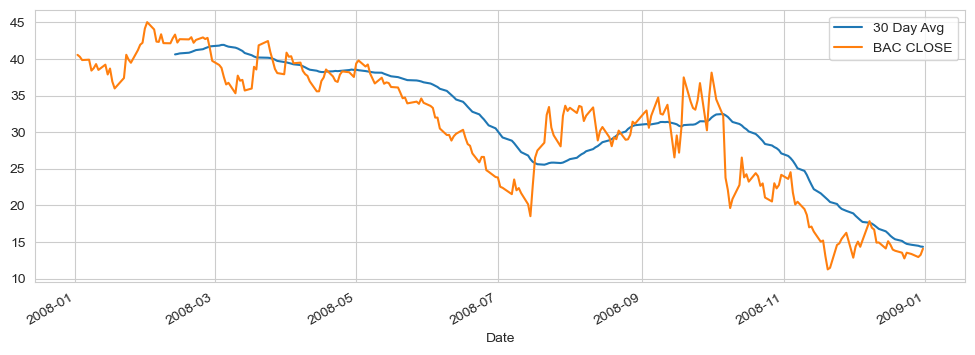

In [35]:
plt.figure(figsize=(12,4))
df['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
df['BAC']['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

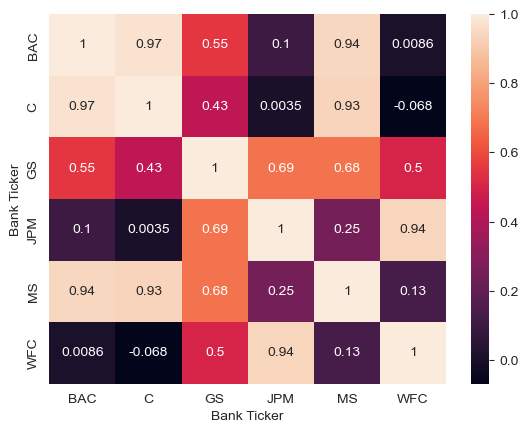

In [36]:
# create heatmap of correlation between the stocks close price

sns.heatmap(df.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

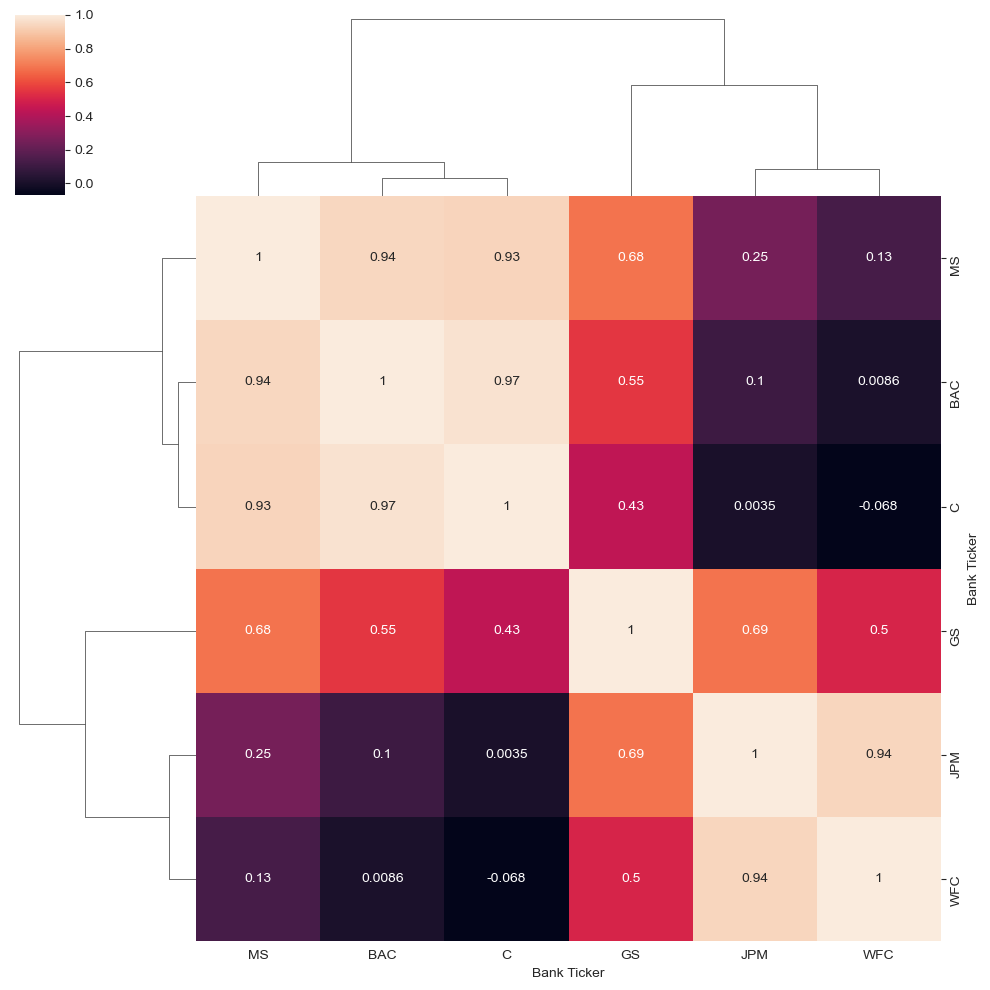

In [37]:
#plot cluster map
sns.clustermap(df.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

Create a candle plotof Bank Of America's stock from Jan 1st 2015 to Jan 1st 2016.


In [39]:
df['BAC'][['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

create a Simple Moving Averages plot of Morgan Stanley for the year 2015.

In [41]:
df['MS']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

to create a Bollinger Band Plot for Bank of America for the year 2015.

In [42]:
df['BAC']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')